# **Visual data analysis in banking**
> Master visual data analysis in banking for machine learning models.

- toc: true
- badges: true
- comments: true
- categories: [Data Visualization, Machine Learning]
- image: images/2021-10-19-box.png

After completing this Jupyter Notebook we will be able to:

1.  Visualize a banking dataset with MatplotLib, Seaborn and Plotly libraries.
2.  Visually analyze single features and feature interaction.
3.  Do a comprehensive visual data analysis for the source dataset.


***


## Materials and Methods


The data that we are going to use for this is a subset of an open source Bank Marketing Data Set from the UCI ML repository: [https://archive.ics.uci.edu/ml/citation_policy.html](https://archive.ics.uci.edu/ml/citation_policy.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsVDA_Banking_L227636609-2021-01-01).

> This dataset is public available for research. The details are described in \[Moro et al., 2014].

Please include this citation if you plan to use this database:
\[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

During the work, the task of a preliminary analysis of a positive response (term deposit) to direct calls from the bank is solved. In essence, the task is the matter of bank scoring, i.e. according to the characteristics of clients (potential clients), their behavior is predicted (loan default, a wish to open a deposit, etc.).

In this lesson, we will try to give answers to a set of questions that may be relevant when analyzing banking data:

1.  What are the most useful Python libraries for visual analysis?
2.  How to build interactive plots?
3.  How to visualize single features?
4.  How to do a visual analysis for the feature interaction?
5.  How to provide a comprehensive visual analysis for numerical and categorical features?

In addition, we will make the conclusions for the obtained results of our visual analysis to plan marketing banking campaigns more effectively.


[Matplotlib](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsVDA_Banking_L227636609-2021-01-01) is a plotting library for the Python programming language and its numerical mathematics extension NumPy. Matplotlib uses an object oriented API to embed plots in Python applications.


[Seaborn](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsVDA_Banking_L227636609-2021-01-01) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.


[Plotly](https://plotly.com/python/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsVDA_Banking_L227636609-2021-01-01) is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases. Built on top of the Plotly JavaScript library (plotly.js), plotly enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks and saved to standalone HTML files.


## Import Libraries


Download data using a URL.


In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2021-10-19 17:03:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip.6’

bank-additional.zip 100%[===================>] 434.15K  1.35MB/s    in 0.3s    

2021-10-19 17:03:39 (1.35 MB/s) - ‘bank-additional.zip.6’ saved [444572/444572]



Alternative URL for the dataset downloading.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VDA_Banking_L2/bank-additional.zip

--2021-10-19 17:03:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VDA_Banking_L2/bank-additional.zip
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/zip]
Saving to: ‘bank-additional.zip.7’

bank-additional.zip 100%[===================>] 434.15K  --.-KB/s    in 0.01s   

2021-10-19 17:03:41 (32.0 MB/s) - ‘bank-additional.zip.7’ saved [444572/444572]



Unzipping to a folder. It is a good idea to apply the `-o` and `-q`  when unzipping to quiet the process and overwrite any existing folders.


In [3]:
!unzip -o -q bank-additional.zip

Import the libraries necessary to use in this lab. We can add some aliases to make the libraries easier to use in our code and set a default figure size for further plots. Ignore the warnings.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

Further specify the value of the `precision` parameter equal to 2 to display two decimal signs (instead of 6 as default).


In [5]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

## Load the Dataset


In this section you will load the source dataset.


In [6]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


The target feature shows a positive behavior of a phone call during the marketing campaign. Mark the positive outcome as 1 and negative one as 0.


Use the `map` function for **replacement the values ​​in column** by passing it as an argument dictionary in form of ` {old_value: new_value}  `.

In [7]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)

### Attribute Information

Output the column (feature) names:


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<details>
<summary><b>Click to see attribute information</b></summary>
Input features (column names):

1.  `age` - client age in years (numeric)
2.  `job` - type of job (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`)
3.  `marital` - marital status (categorical: `divorced`, `married`, `single`, `unknown`)
4.  `education` - client education (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)
5.  `default` - has credit in default? (categorical: `no`, `yes`, `unknown`)
6.  `housing` - has housing loan? (categorical: `no`, `yes`, `unknown`)
7.  `loan` - has personal loan? (categorical: `no`, `yes`, `unknown`)
8.  `contact` - contact communication type (categorical: `cellular`, `telephone`)
9.  `month` - last contact month of the year (categorical: `jan`, `feb`, `mar`, ..., `nov`, `dec`)
10. `day_of_week` - last contact day of the week (categorical: `mon`, `tue`, `wed`, `thu`, `fri`)
11. `duration` - last contact duration, in seconds (numeric).
12. `campaign` - number of contacts performed for this client during this campaign (numeric, includes last contact)
13. `pdays` - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
14. `previous` - number of contacts performed for this client before this campaign (numeric)
15. `poutcome` - outcome of the previous marketing campaign (categorical: `failure`, `nonexistent`, `success`)
16. `emp.var.rate` - employment variation rate, quarterly indicator (numeric)
17. `cons.price.idx` - consumer price index, monthly indicator (numeric)
18. `cons.conf.idx` - consumer confidence index, monthly indicator (numeric)
19. `euribor3m` - euribor 3 month rate, daily indicator (numeric)
20. `nr.employed` - number of employees, quarterly indicator (numeric)

Output feature (desired target):

21. `y` - has the client subscribed a term deposit? (binary: `yes`,`no`)

</details>


Let's look at the dataset size.


In [9]:
df.shape

(41188, 21)

The dataset contains 41188 objects (rows), for each of which 21 features are set (columns), including 1 target feature (y).


## Overview of Python libraries for visual data analysis


### Matplotlib


Let's start our overview of Python libraries for visual data analysis with the simplest and fastest way to visualize data from Pandas DataFrame - to use the functions `plot` and`  hist `. The implementation of these functions in Pandas is based on the matplotlib library.


For each feature, you can build a separate histogram with `hist` function:


<AxesSubplot:>

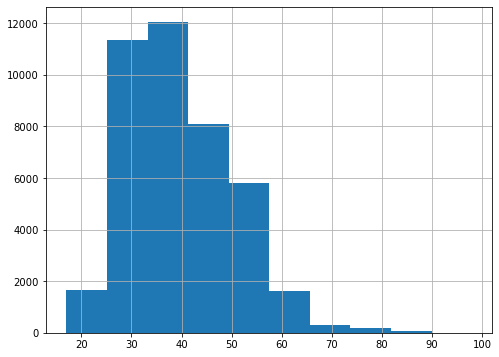

In [10]:
df["age"].hist()

The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.


We will build a graph of the average client age depending on the marital status. To begin with, we only specify the columns we need, then calc the average values ​​and for the received DataFrame call the `plot` function without parameters.


<AxesSubplot:xlabel='marital'>

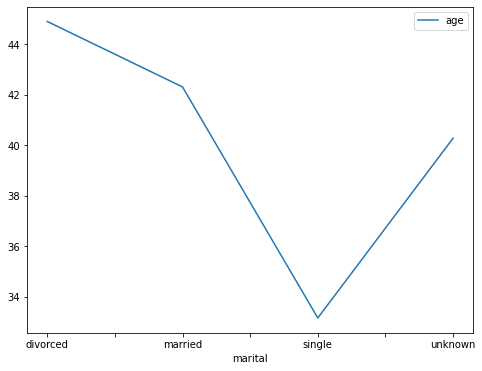

In [11]:
df[["age", "marital"]].groupby('marital').mean().plot()

The plot shows that the average age of unmarried clients is significantly lower than that of the other clients.


With the `kind` parameter you can change the plot type, for example, to a bar chart. MATPLOTLIB allows you to configure graphics very flexibly. You can change almost anything on the chart, but you will need to look up the necessary parameters in the [documentation](https://matplotlib.org/stable/contents.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsVDA_Banking_L227636609-2021-01-01). For example, the `rot` parameter is responsible for the angle of tilt signatures to the x axis.


<AxesSubplot:xlabel='marital'>

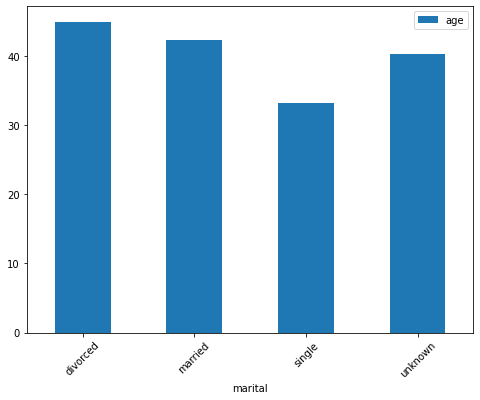

In [12]:
df[["age", "marital"]].groupby("marital").mean().plot(kind="bar", rot=45)

### Seaborn


Now let's go to the seaborn library. Seaborn is a higher-level API based on the matplotlib library. Seaborn contains more adequate default graphics settings. Also there are quite complex types of visualization in the library, which would require a large amount of code in matplotlib.

We will get acquainted with the first "complex" type of pair plot graphics (Scatter Plot Matrix). This visualization will help us to look at one picture as at interconnection of various features.


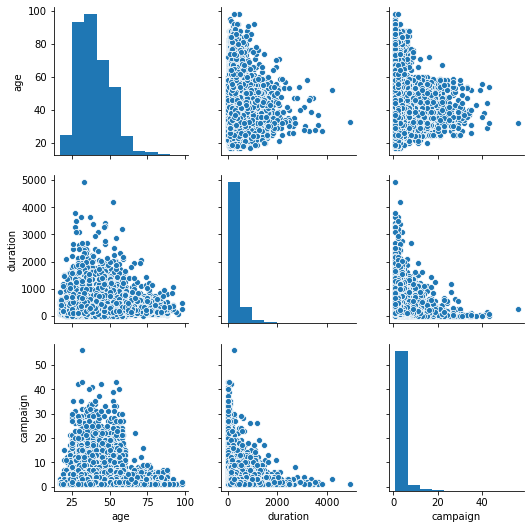

In [13]:
sns.pairplot(
    df[["age", "duration", "campaign"]]
)

This visualization allows us to identify an interesting inverse relationship between a campaign and duration, which indicates a decrease in the duration of contact with the client with an increase in their contact quantity during the campaign.


Also with the help of `seaborn` you can build a distribution, for example, look at the distribution of the client age. To do this, build `distplot`. By default, the graph shows a histogram and [Kernel Density Estimation](https://en.wikipedia.org/wiki/kernel_density_estimation?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsVDA_Banking_L227636609-2021-01-01).


<AxesSubplot:xlabel='age'>

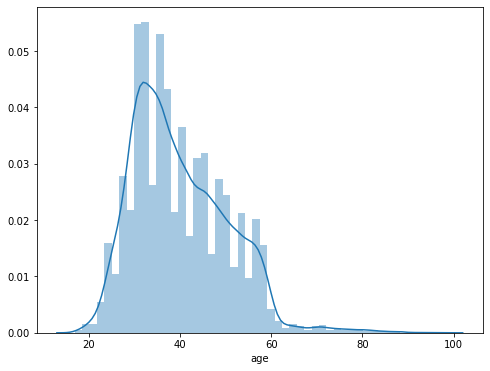

In [14]:
sns.distplot(df.age)

In order to look more for the relationship between two numerical features, there is also `joint_plot` - this is a hybrid Scatter Plot and Histogram (there are also histograms of feature distributions). Let's look at the relationship between the number of contacts in a campaign and the last contact duration.


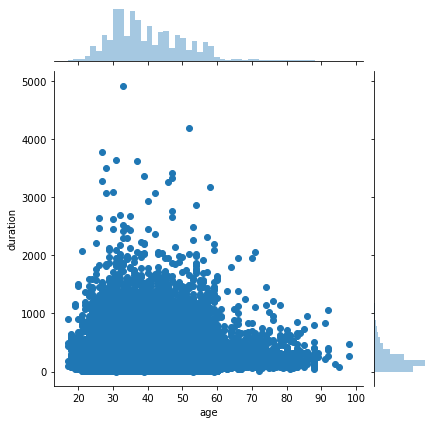

In [15]:
sns.jointplot(x="age", y="duration", data=df, kind="scatter")

Another useful seaborn plot type is [**Box Plot** ("Box and whisker plot")](https://en.wikipedia.org/wiki/box_plot?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsVDA_Banking_L227636609-2021-01-01). Let's compare the age of customers for the top 5 of the most common employment forms.


<AxesSubplot:xlabel='age', ylabel='job'>

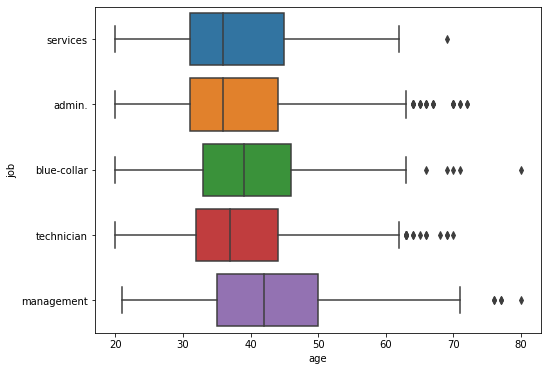

In [16]:
top_jobs = (
    df.job.value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="job", x="age", data=df[df.job.isin(top_jobs)], orient="h"
)

The plot shows that among the top-5 client categories by the type of employment, the most senior customers represent the management, and the largest number of outliers is among the categories of admin. and technician.


And one more plot type (the last of those we consider in this chapter) is a `heat map`. A Heat Map allows you to look at the distribution of some numerical feature in two categories. We visualize the distribution of clients on family status and the type of employment.


<AxesSubplot:xlabel='marital', ylabel='job'>

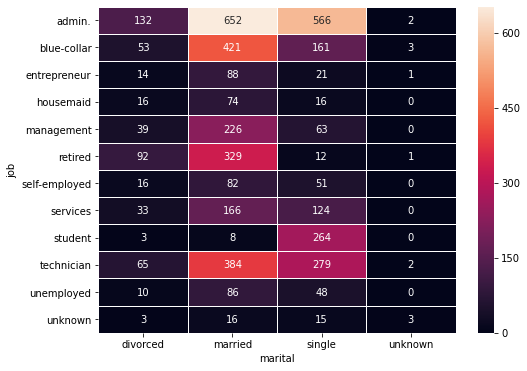

In [17]:
job_marital_y = (
    df.pivot_table(
        index="job", columns="marital", values="y", aggfunc=sum
    )
)
sns.heatmap(job_marital_y, annot=True, fmt="d", linewidths=0.5)

The plot shows that the largest number of attracted clients among administrative workers is married (652), and there is the smallest number of attracted clients among customers with an unknown family status.


### Plotly


We looked at the visualization based on the Library `Matplotlib` and `Seaborn`. However, this is not the only option to build charts with `Python`. We will also get acquainted with the library `plotly`. `Plotly` is an open-source library that allows you to build interactive graphics in a jupyter notebook without having to break into JavaScript code.

The beauty of interactive graphs is that you can see the exact numerical value on mouse hover, hide the uninteresting rows in the visualization, zoom in a certain area of ​​graphics, etc.


To begin with, we build **Line Plot** with the distribution of the total number and the number of attracted clients by age.


In [18]:
age_df = (
    df.groupby("age")[["y"]]
    .sum()
    .join(df.groupby("age")[["y"]].count(), rsuffix='_count')
)
age_df.columns = ["Attracted", "Total Number"]

In `Plotly`, we create the `Figure` object, which consists of data (list of lines that are called `traces`) and design/style, for which the object `Layout` was created. In simple cases, you can call the function `iplot` just for the `traces` list.


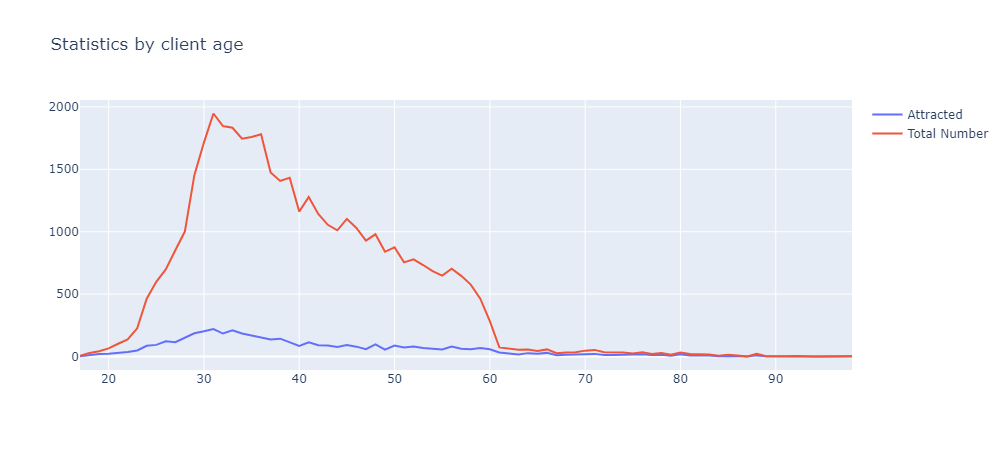

In [19]:
trace0 = go.Scatter(x=age_df.index, y=age_df["Attracted"], name="Attracted")
trace1 = go.Scatter(x=age_df.index, y=age_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Statistics by client age"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Let us also see the distribution of customers by months, designed by the number of attracted clients and on the total number of clients. To do this, build **Bar Chart**.


In [20]:
month_index = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
month_df = (
    df.groupby("month")[["y"]]
    .sum()
    .join(df.groupby("month")[["y"]].count(), rsuffix='_count')
).reindex(month_index)
month_df.columns = ["Attracted", "Total Number"]

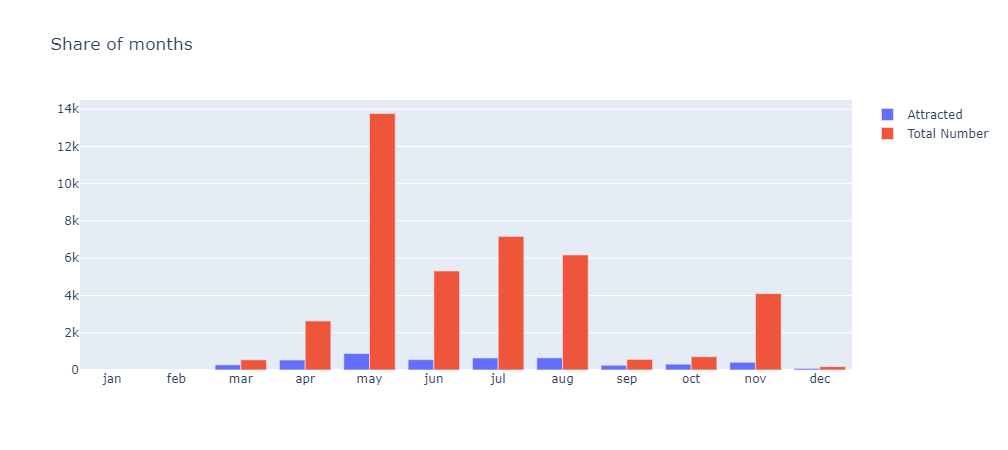

In [21]:
trace0 = go.Bar(x=month_df.index, y=month_df["Attracted"], name="Attracted")
trace1 = go.Bar(x=month_df.index, y=month_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Share of months"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

`plotly` can build the **Box plot**. Consider the differences in the client age depending on the family status.


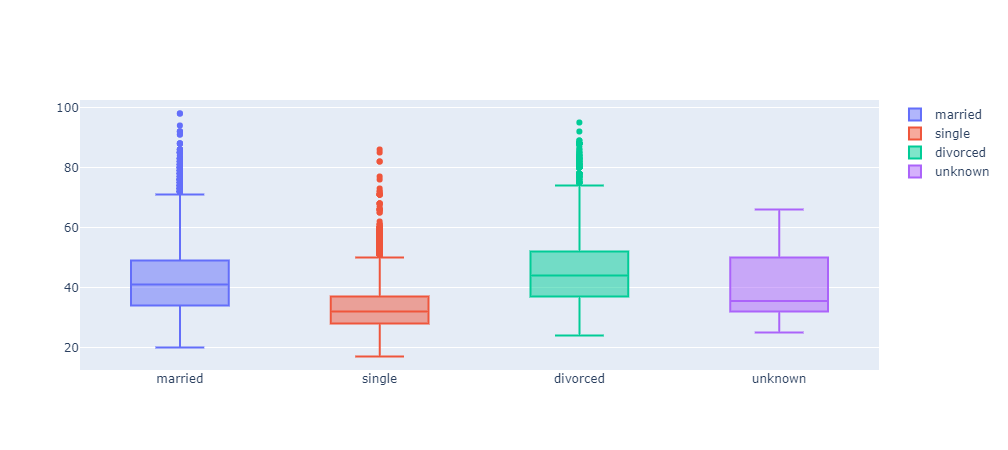

In [22]:
data = []

for status in df.marital.unique():
    data.append(go.Box(y=df[df.marital == status].age, name=status))
iplot(data, show_link=False)

The plot clearly shows the distribution of clients by age, the presence of outliers for all categories of the family status, except for `unknown`. Moreover, the plot is interactive - hovering the mouse pointer to its elements allows you to obtain additional statistical characteristics of the series. Discover the characteristics.


## Visual analysis of single features


Let us give the most commonly used plot types to analyze single features of data sets.


#### Numerical features


For the analysis of numerical features, a histogram and a box plot are most often used.


<AxesSubplot:>

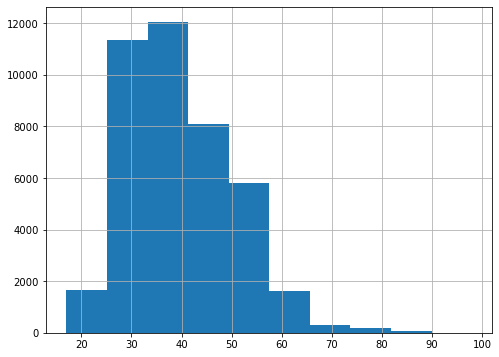

In [23]:
df["age"].hist()

Build a box plot for the `cons.price.idx` feature with `sns.boxplot` function.


<AxesSubplot:xlabel='cons.price.idx'>

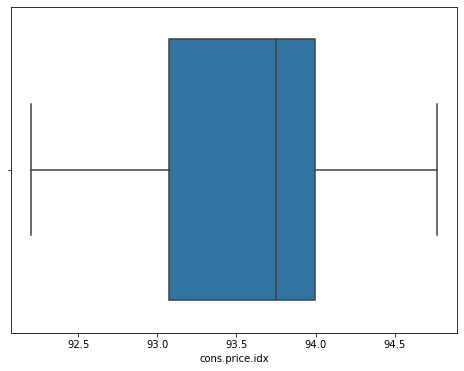

In [24]:
sns.boxplot(df['cons.price.idx'])

### Categorical features


Use the `countplot` graphics for effective analysis of categorical features.
It's effective to use the graphics of the type `CountPlot` for analyzing categorical features.

Calculate the client distribution of marital status.


In [25]:
df["marital"].value_counts().head()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Let's calculate the client distribution on the fact of their involvement for signing a deposit as well.


In [26]:
df["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Present this information graphically.


<AxesSubplot:xlabel='y', ylabel='count'>

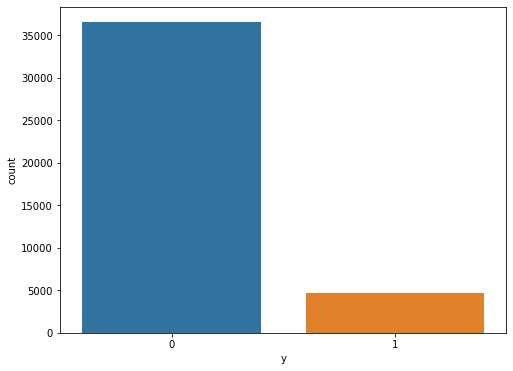

In [27]:
sns.countplot(df["y"])

Build the count plot for the `marital` feature with `sns.countplot` function.


<AxesSubplot:xlabel='marital', ylabel='count'>

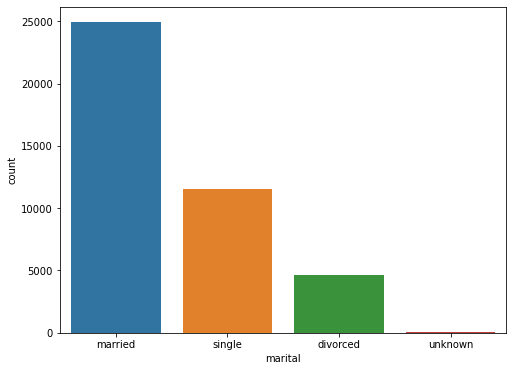

In [28]:
sns.countplot(df['marital'])

Plot the graphical client distribution by the 5 most common types of employment.


[None, None, None, None, None, None, None, None, None, None]

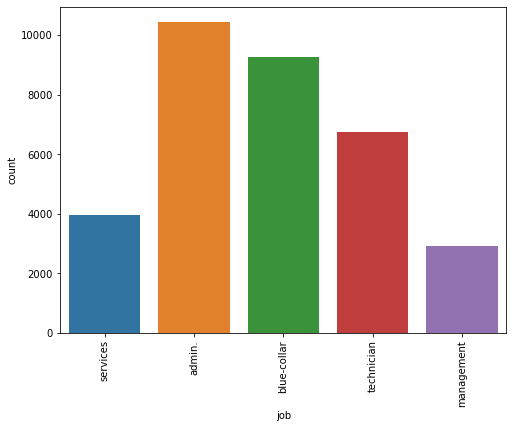

In [29]:
plot = sns.countplot(df[df["job"].isin(df["job"].value_counts().head(5).index)]["job"])
plt.setp(plot.get_xticklabels(), rotation=90)

## Visual analysis of the feature interaction


### Numerical features


To analyze the interaction of numerical features, use `hist` (histogram), `pairplot` and `heatmap` plot functions.


We visualize the values ​​of the economy macro indicators from the dataset.


array([[<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>],
       [<AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr.employed'}>]], dtype=object)

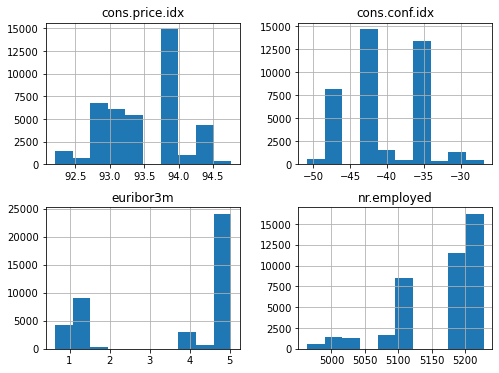

In [30]:
feat = ["cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

df[feat].hist()

Build a pair plot set for the `feat` list with `sns.pairplot` function.


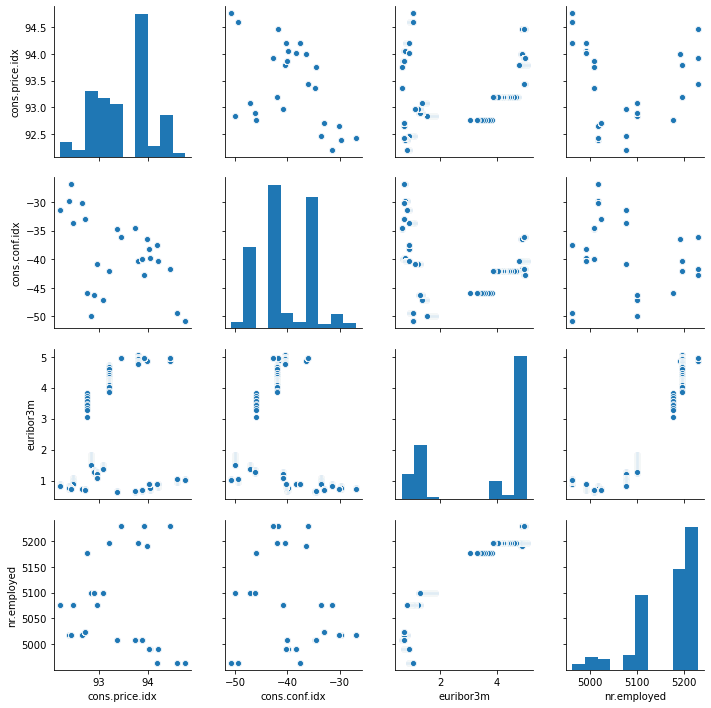

In [31]:
sns.pairplot(df[feat])

Build a Heat Map for the economy macro indicators [correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsVDA_Banking_L227636609-2021-01-01#Correlation_matrices).


<AxesSubplot:>

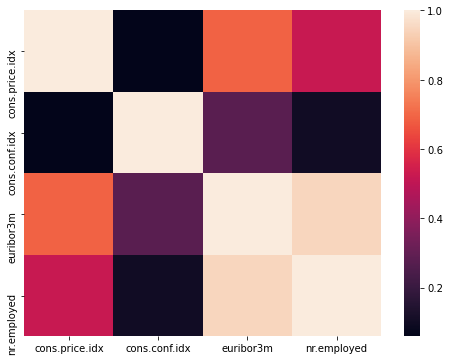

In [32]:
sns.heatmap(df[feat].corr())

We see a strong interaction between the `euribor3m` and `nr.employed` features.


### Numerical and categorical features


`boxplot` and `violinplot` are used for visual analysis of the numerical and categorical features.

Let's look at the `age` feature box plot by the target feature.


<AxesSubplot:xlabel='y', ylabel='age'>

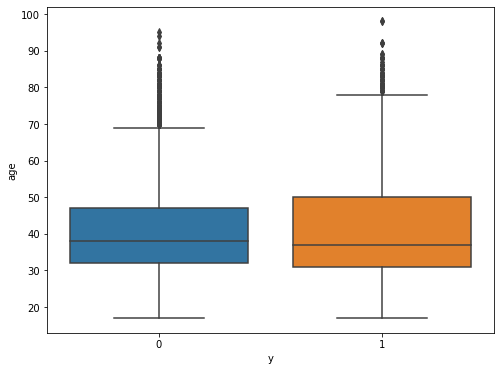

In [33]:
sns.boxplot(x="y", y="age", data=df)

Build the box plot for the `marital` feature with `sns.boxplot` function.


<AxesSubplot:xlabel='marital', ylabel='age'>

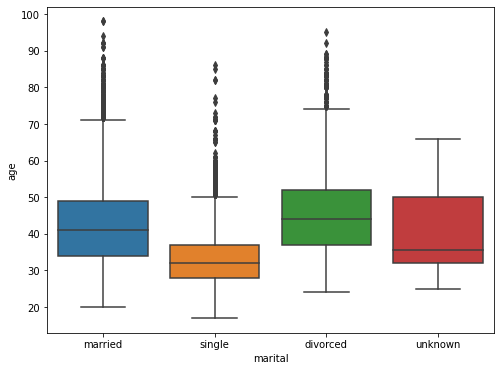

In [34]:
sns.boxplot(x='marital', y='age', data=df)

You can draw a combination of boxplot and kernel density estimate with a `violinplot` function. A [violin plot](https://en.wikipedia.org/wiki/Violin_plot?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsVDA_Banking_L227636609-2021-01-01) plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

Plot the client age distribution across the target feature.


<AxesSubplot:xlabel='y', ylabel='age'>

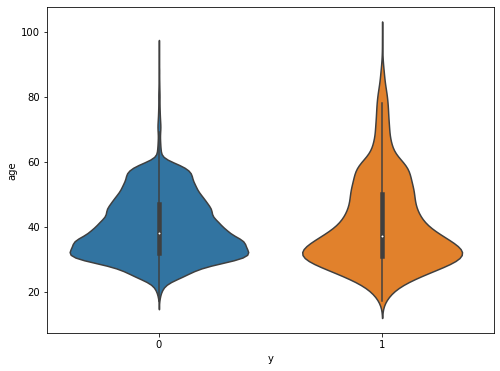

In [35]:
sns.violinplot(x="y", y="age", data=df)

It is useful to combine grouping with a `boxplot`. Calculate the mean client for the grouping by the `housing` feature values.


In [36]:
df.groupby("housing")["age"].mean()

housing
no        40.04
unknown   39.95
yes       40.01
Name: age, dtype: float64

Build a box plot for the `age` feature by the `housing` values with `sns.boxplot` function.


<AxesSubplot:xlabel='housing', ylabel='age'>

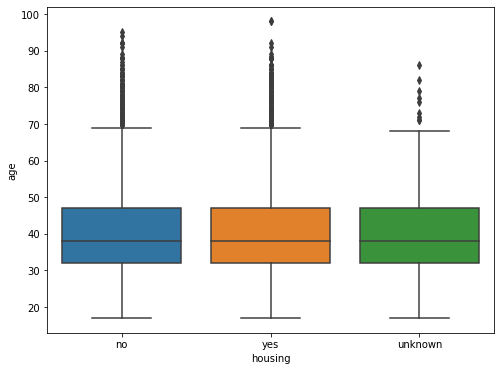

In [37]:
sns.boxplot(x='housing', y='age', data=df)

### Categorical features


Use `countplot` for a visual interaction analysis between categorical features.

Calculate and visualize the interaction between target and client marital status features.


In [38]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


<AxesSubplot:xlabel='marital', ylabel='count'>

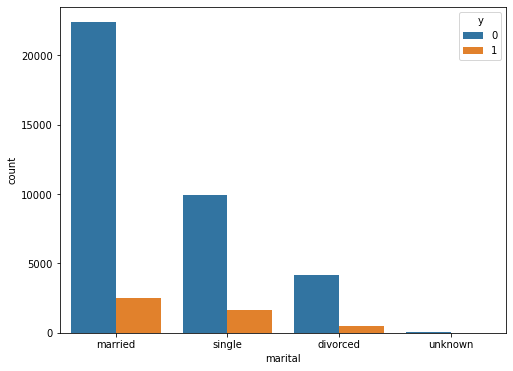

In [39]:
sns.countplot(x="marital", hue="y", data=df)

Build the count plot for the `month` feature by the `y` feature target values with `sns.countplot` function.


<AxesSubplot:xlabel='month', ylabel='count'>

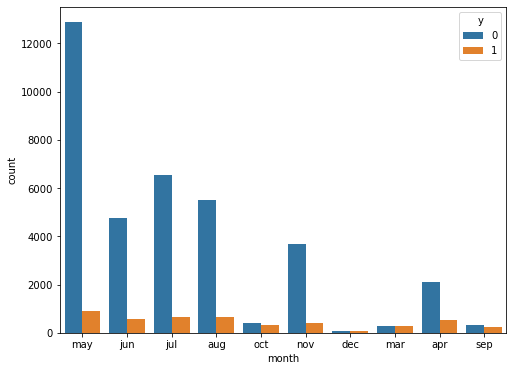

In [40]:
sns.countplot(x='month', hue='y', data=df)

## Comprehensive visual analysis of the source banking dataset


Create the `categorical` and `numerical` lists for the correspondent dataset features.

Let's look at the distribution of numerical features with `hist` function.


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

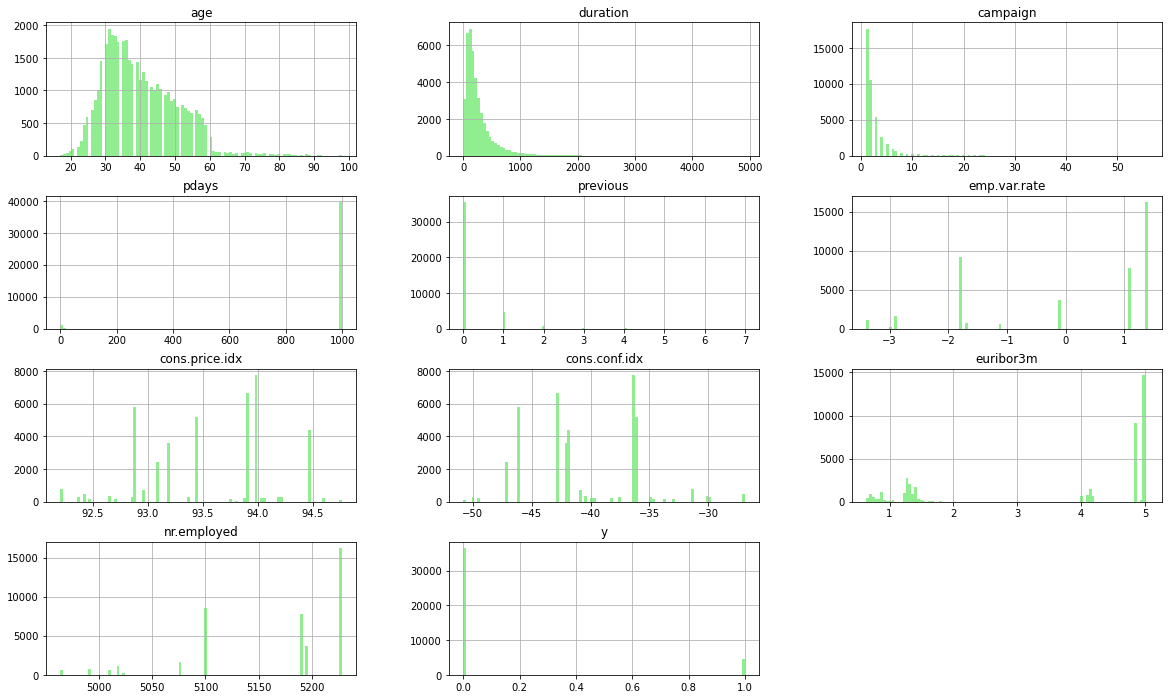

In [41]:
categorical = []
numerical = []
for feature in df.columns:
    if df[feature].dtype == object:
        categorical.append(feature)
    else:
        numerical.append(feature)

df[numerical].hist(figsize=(20,12), bins=100, color='lightgreen')

From the histograms, we see that **for each numerical feature there is one or more dominant segments of values​**, that is why we got pronounced peaks.

In addition, we see that the target feature is unbalanced. **The number of positive outcomes is significantly lower than negative**, which is quite natural for telephone marketing. As a result, the problem arises with the fact that many methods are sensitive to the imbalance of features. We will try to solve this problem later.

Next, let's look at the categorical features.


In [42]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


Visualize the categorical features with bar plots.


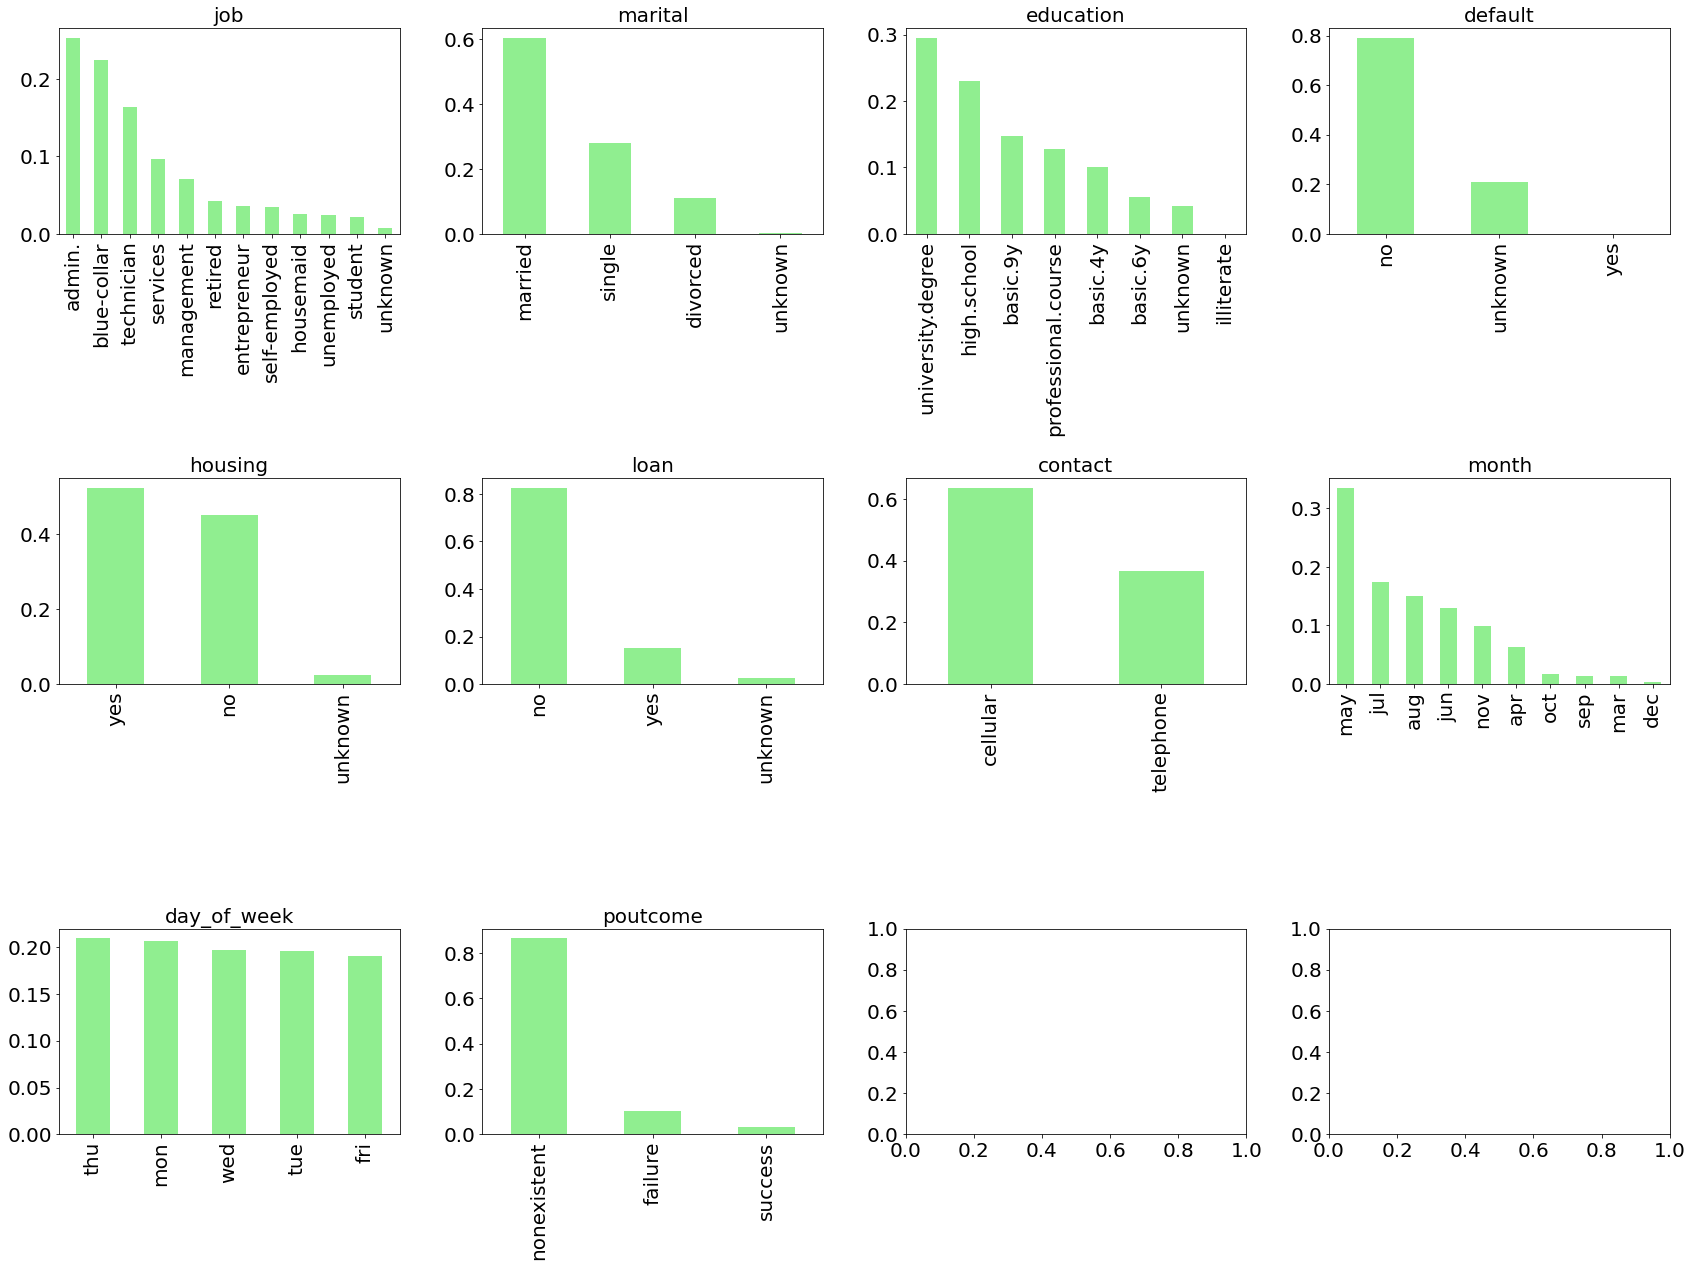

In [43]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20

fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    df[categorical[i]].value_counts(normalize=True).plot(kind='bar', label=categorical[i], ax=axes[i//4, i%4], color='lightgreen')
    axes[i//4, i%4].set_title(categorical[i])
plt.tight_layout()

As we see, for many features, some of the groups stand out, for example, in the dataset more than half of the clients are married.


Let's look at the correlation matrix (for the numerical features).


In [44]:
correlation_table = df.corr()
correlation_table

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02,0.03
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04,0.41
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14,-0.07
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37,-0.32
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50,0.23
emp.var.rate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91,-0.30
cons.price.idx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52,-0.14
cons.conf.idx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10,0.05
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95,-0.31
nr.employed,-0.02,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00,-0.35


We visualize the correlation matrix.


<AxesSubplot:>

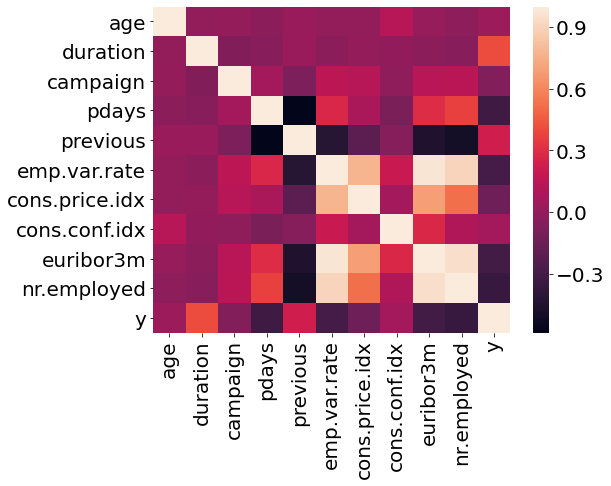

In [45]:
sns.heatmap(correlation_table)

Let's look at the visualized dependences of numerical features from the target feature with scatter plots.


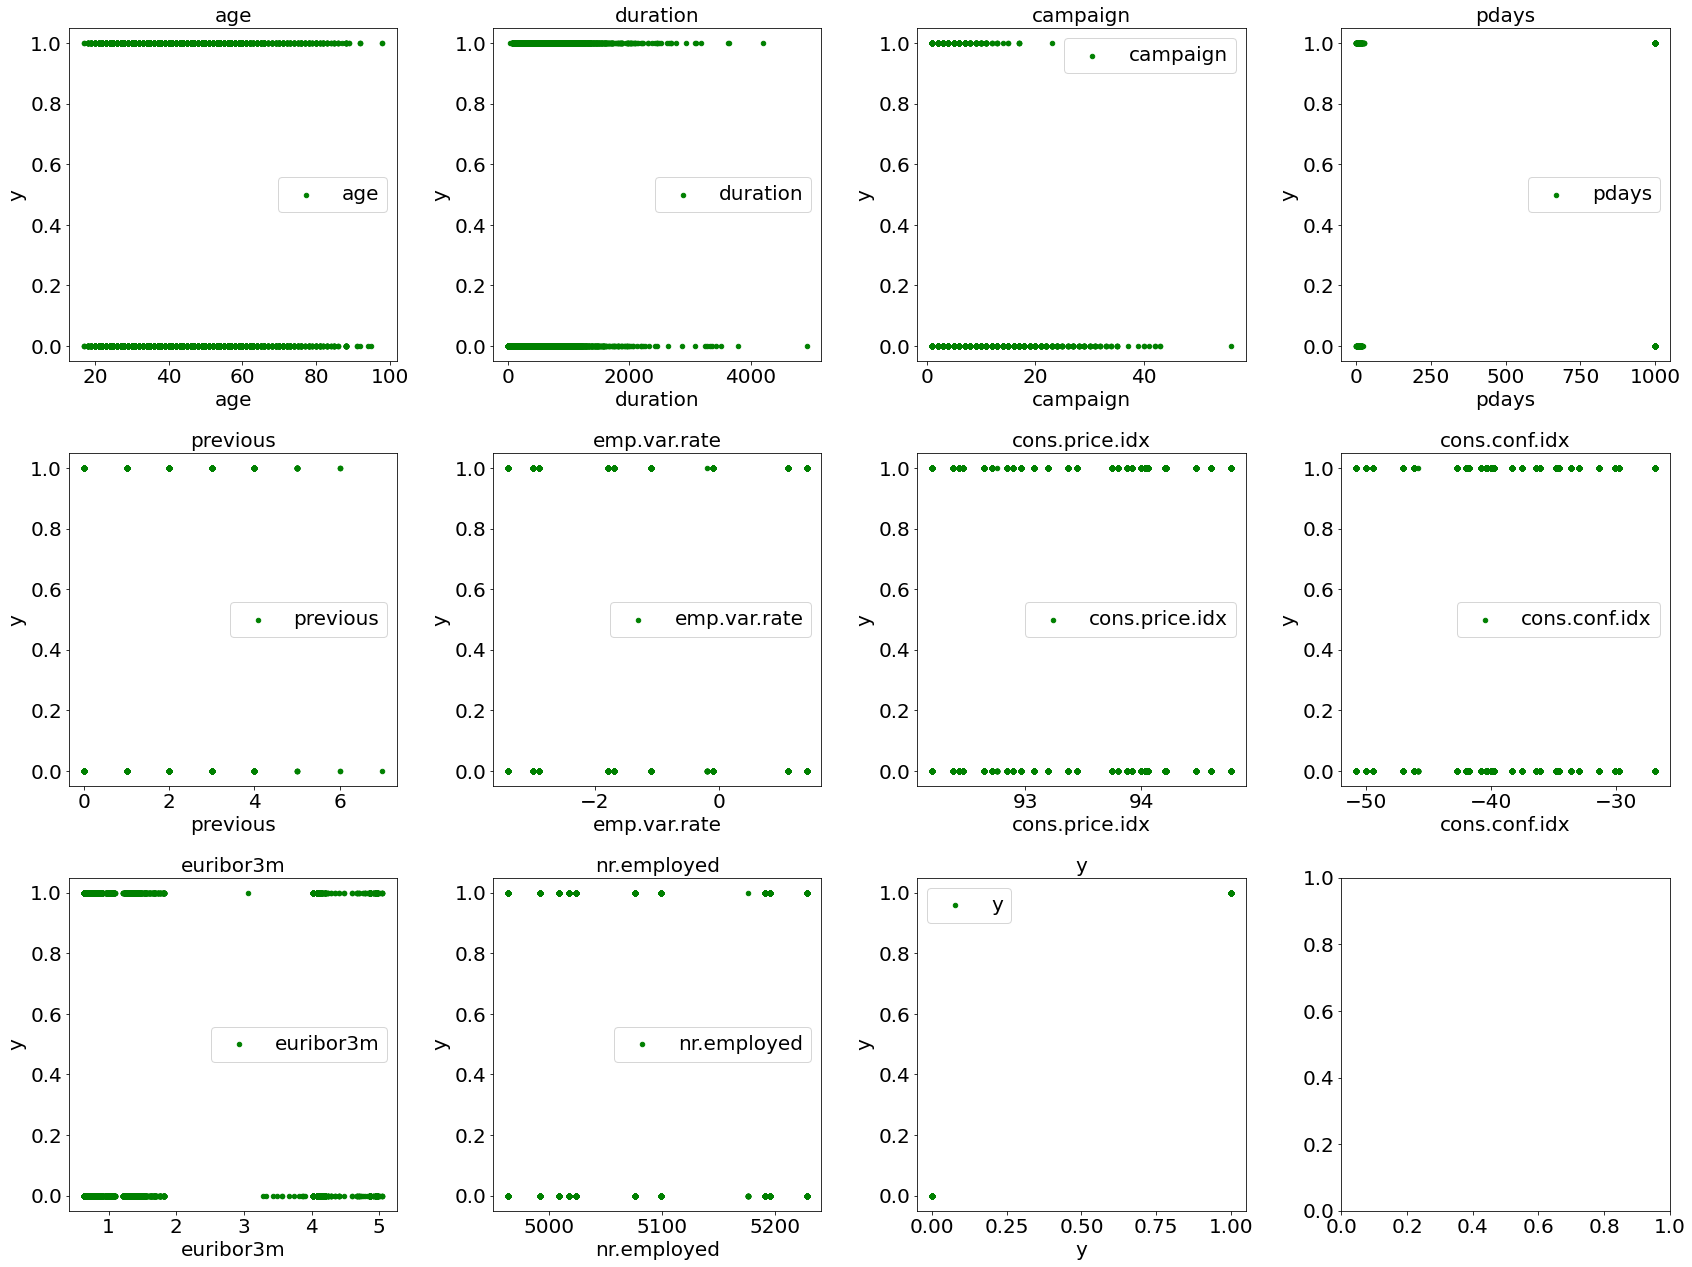

In [46]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(numerical)):
    df.plot(x=numerical[i], y='y', label=numerical[i], ax=axes[i//4, i%4], kind='scatter', color='green')
    axes[i//4, i%4].set_title(numerical[i])
plt.tight_layout()

As you can see, there are points that can be interpreted as outliers, however, we will not hurry to delete them because they don't seem to be true outliers. These points are too strong so we will leave them. In addition, we will use some models that are resistant to outliers.


We visualize **the distribution of positive target responses** by groups:


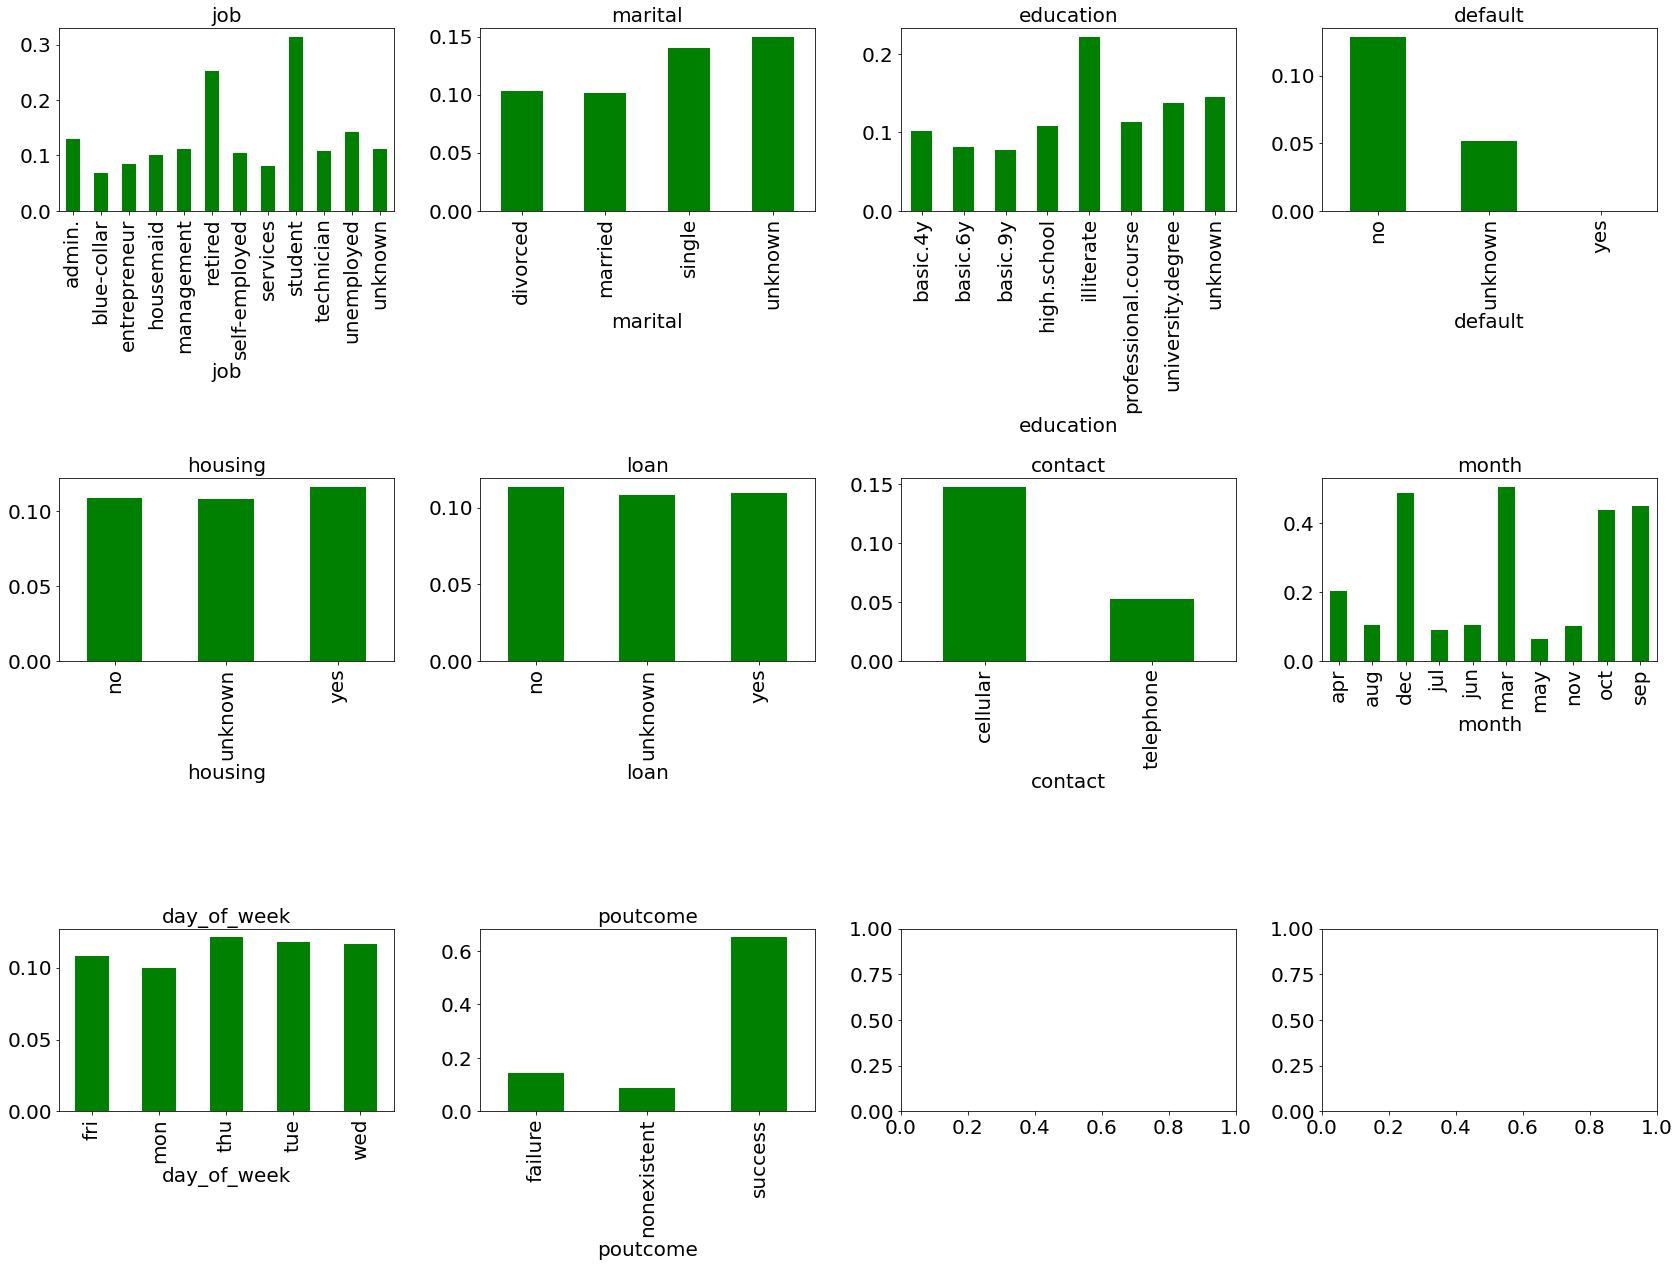

In [47]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    df.groupby(categorical[i])['y'].mean().plot(kind='bar', ax=axes[i//4, i%4], color='green')
    axes[i//4, i%4].set_title(categorical[i])

plt.tight_layout()

In such a form, plots are already more interesting. So we see, for many features, the chance of a positive response is significantly higher.

We also see that `housing`, `loan` and `day_of_week` features will hardly help us, because judging by the plots, the share of positive target responses hardly depends on them.


### Conclusions


There are neither any data missing, nor explicit outliers that should be cut. But we can omit `housing`, `loan` and `day_of_week` features in the next steps.

The `euribor3m` and `nr.employed` features strongly correlate with `emp.var.rate`. Let me remind you that `emp.var.rate` - Employment Variation Rate is a quarterly indicator, `euribor3m` - euribor 3 month rate is a day indicator, and `nr.employed` - number of employees is a quarterly indicator. The correlation of the employment change with the number of employed issues itself is obvious, but its correlation with EURIBOR (Euro Interbank Offered Rate, the European interbank offer rate) is interesting. This indicator is based on the average interbank interest rates in Eurozone. It also has a positive effect since the higher the interest rate is, the more willingly customers will spend their money on financial tools.

Therefore, if banks want to improve their lead generation, what they should do is to improve the quality of phone conversations and run their campaigns when interest rates are high and the macroeconomic environment is stable.


## Authors


[Roman Yatsenko](https://www.linkedin.com/in/yatsenkorn/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsVDA_Banking_L227636609-2021-01-01)


Copyright © 2021 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsVDA_Banking_L227636609-2021-01-01).
